<a href="https://colab.research.google.com/github/Mennatullah61/DEPI-Final-Project/blob/Data-Preprocessing/RFM_NewCustomerList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rfm_new = pd.read_excel('/content/RFM Analysis.xlsx', sheet_name='NewCustomerList')
rfm_new

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.04,1.3000,1.6250,1.381250,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.85,0.8500,1.0625,0.903125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.56,0.5600,0.5600,0.560000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.51,0.6375,0.6375,0.637500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.00,1.0000,1.2500,1.250000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.96,0.9600,0.9600,0.960000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.44,0.4400,0.5500,0.467500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.77,0.9625,0.9625,0.962500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.69,0.8625,0.8625,0.733125,997,997,0.357000


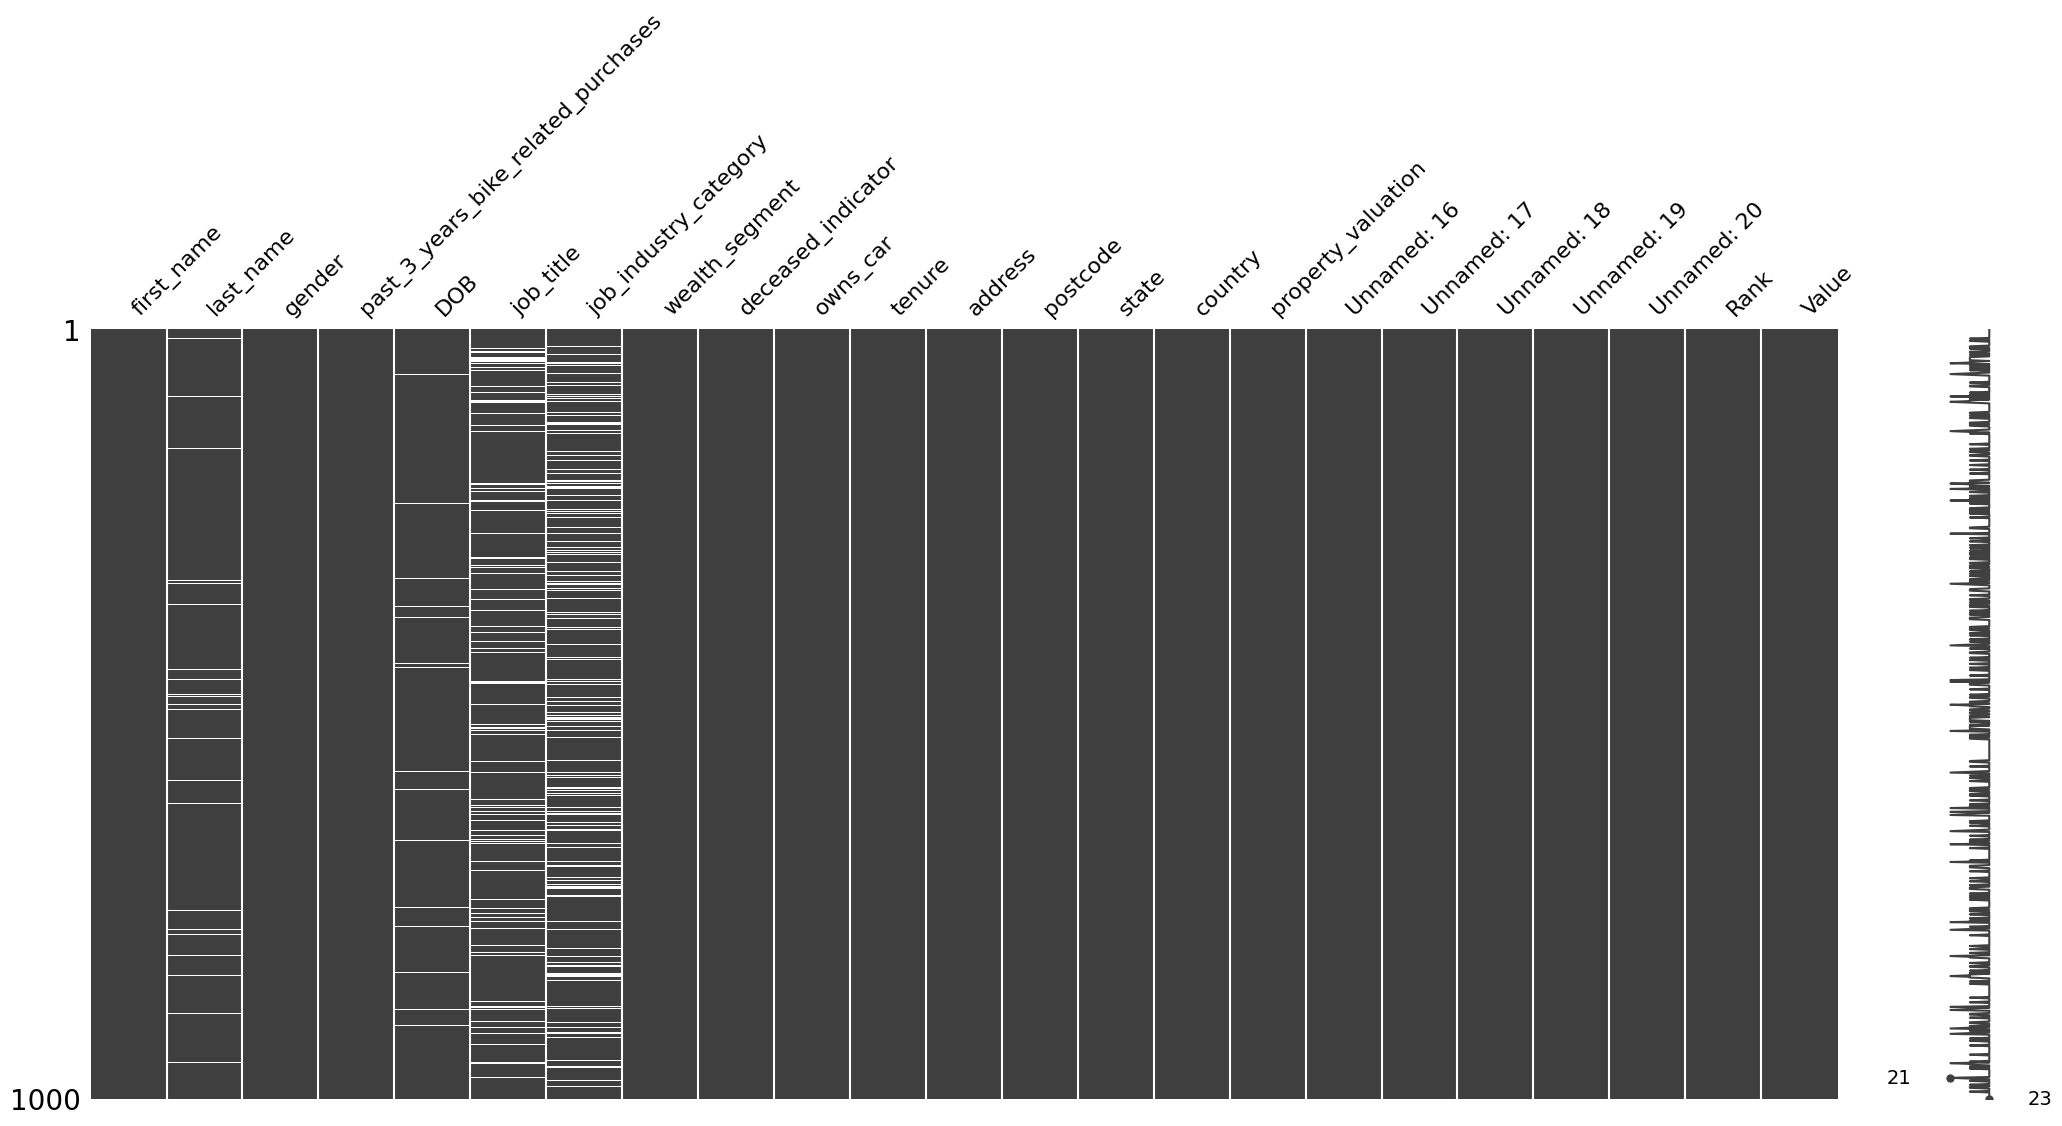

In [ ]:
import missingno as msno
msno.matrix(rfm_new)
plt.show()

In [ ]:
rfm_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [ ]:
rfm_new['last_name'].fillna(' ', inplace=True)
rfm_new['name'] = rfm_new['first_name'] + ' ' + rfm_new['last_name']

In [ ]:
rfm_new['DOB'] = pd.to_datetime(rfm_new['DOB'])

rfm_new['age'] = (pd.to_datetime('2017-12-30') - rfm_new['DOB']).dt.days // 365

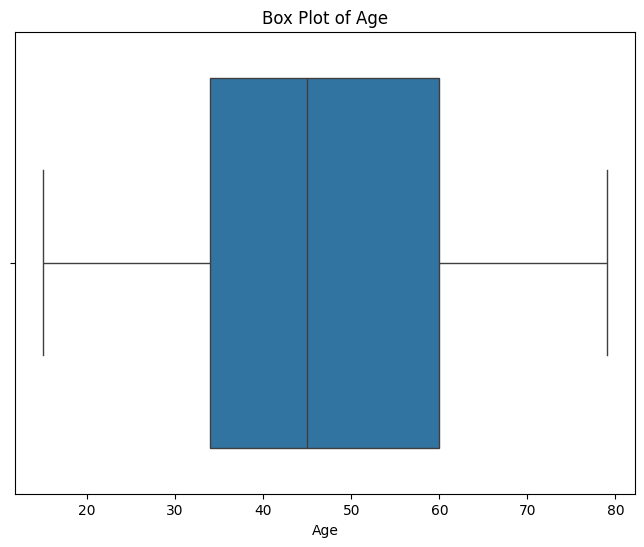

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=rfm_new)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

In [ ]:
rfm_new['age'].fillna(rfm_new['age'].mean(), inplace=True)
rfm_new.drop('DOB', axis=1, inplace=True)

In [ ]:
print(rfm_new['Unnamed: 16'].value_counts())
print(rfm_new['Unnamed: 17'].value_counts())
print(rfm_new['Unnamed: 18'].value_counts())
print(rfm_new['Unnamed: 19'].value_counts())
print(rfm_new['Unnamed: 20'].value_counts())

Unnamed: 16
0.87    22
0.41    22
0.43    21
0.58    21
1.09    20
        ..
0.71     7
0.84     7
0.49     7
1.10     6
0.80     4
Name: count, Length: 71, dtype: int64
Unnamed: 17
0.550    21
0.870    17
0.950    16
0.500    15
0.600    15
         ..
0.930     2
0.940     2
0.910     2
0.840     2
1.375     2
Name: count, Length: 132, dtype: int64
Unnamed: 18
0.987500    15
0.512500    15
0.687500    15
0.937500    14
0.750000    14
            ..
1.156250     1
0.620000     1
1.140625     1
0.910000     1
0.890625     1
Name: count, Length: 187, dtype: int64
Unnamed: 19
0.637500    13
1.062500    12
0.796875    10
1.009375     9
0.839375     9
            ..
1.578125     1
1.515625     1
1.288281     1
0.969531     1
0.962500     1
Name: count, Length: 325, dtype: int64
Unnamed: 20
760     13
259     12
455      9
133      9
386      9
        ..
240      1
248      1
657      1
249      1
1000     1
Name: count, Length: 324, dtype: int64


In [ ]:
rfm_new['Rank'].value_counts()

,count
Rank,
760,13
259,12
455,9
133,9
386,9
...,...
240,1
248,1
657,1


In [ ]:
rfm_new['Value'].value_counts()

,count
Value,
0.637500,13
1.062500,12
0.892500,9
1.237500,9
0.945625,9
...,...
1.090000,1
1.078125,1
0.714000,1


In [ ]:
rfm_new['property_valuation'].value_counts()

,count
property_valuation,
9,173
8,162
7,138
10,116
6,70
11,62
5,57
4,53
3,51


In [ ]:
rfm_new['country'].value_counts()

,count
country,
Australia,1000


In [ ]:
rfm_new.drop('country', axis=1, inplace=True)
rfm_new['state'].value_counts()

,count
state,
NSW,506
VIC,266
QLD,228


In [ ]:
rfm_new['state'] = rfm_new['state'].replace(['NSW', 'VIC', 'QLD'], ['New South Wales', 'Victoria', 'Queensland'])
rfm_new['state'].value_counts()

,count
state,
New South Wales,506
Victoria,266
Queensland,228


In [ ]:
rfm_new['postcode'].value_counts()

,count
postcode,
2145,9
2232,9
2750,7
3977,7
2148,7
...,...
2576,1
2479,1
3065,1


In [ ]:
rfm_new['tenure'].value_counts()

,count
tenure,
9,79
13,74
11,68
10,63
12,61
5,60
7,60
17,59
15,58


In [ ]:
rfm_new.drop('address', axis=1, inplace=True)
# rfm_new.drop(['street', 'no_street'], axis=1, inplace=True)

In [ ]:
rfm_new

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,name,age
0,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,6,1.04,1.3000,1.6250,1.381250,1,1,1.718750,Chickie Brister,60.0
1,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,...,11,0.85,0.8500,1.0625,0.903125,1,1,1.718750,Morly Genery,47.0
2,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,5,0.56,0.5600,0.5600,0.560000,1,1,1.718750,Ardelis Forrester,43.0
3,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,1,0.51,0.6375,0.6375,0.637500,4,4,1.703125,Lucine Stutt,38.0
4,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,9,1.00,1.0000,1.2500,1.250000,4,4,1.703125,Melinda Hadlee,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,Paralegal,Financial Services,Affluent Customer,N,No,9,...,7,0.96,0.9600,0.9600,0.960000,996,996,0.374000,Ferdinand Romanetti,58.0
996,Burk,Wortley,Male,22,Senior Sales Associate,Health,Mass Customer,N,No,6,...,10,0.44,0.4400,0.5500,0.467500,997,997,0.357000,Burk Wortley,16.0
997,Melloney,Temby,Female,17,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,...,2,0.77,0.9625,0.9625,0.962500,997,997,0.357000,Melloney Temby,63.0
998,Dickie,Cubbini,Male,30,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,...,2,0.69,0.8625,0.8625,0.733125,997,997,0.357000,Dickie Cubbini,65.0


In [ ]:
print(rfm_new['owns_car'].value_counts())
print(rfm_new['deceased_indicator'].value_counts())
print(rfm_new['gender'].value_counts())
print(rfm_new['wealth_segment'].value_counts())
print(rfm_new['past_3_years_bike_related_purchases'].value_counts())

owns_car
No     507
Yes    493
Name: count, dtype: int64
deceased_indicator
N    1000
Name: count, dtype: int64
gender
Female    513
Male      470
U          17
Name: count, dtype: int64
wealth_segment
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: count, dtype: int64
past_3_years_bike_related_purchases
60    20
59    18
42    17
70    17
11    16
      ..
19     5
9      5
92     5
85     4
20     3
Name: count, Length: 100, dtype: int64


In [ ]:
rfm_new['deceased_indicator'].unique()

array(['N'], dtype=object)

In [ ]:
rfm_new.drop('deceased_indicator', axis=1, inplace=True)

In [ ]:
rfm_new.isnull().sum()

,0
first_name,0
last_name,0
gender,0
past_3_years_bike_related_purchases,0
job_title,106
job_industry_category,165
wealth_segment,0
owns_car,0
tenure,0
postcode,0


In [ ]:
rfm_new['job_title'].str.lower().value_counts()

,count
job_title,
associate professor,15
environmental tech,14
software consultant,14
chief design engineer,13
assistant manager,12
...,...
accountant ii,1
programmer iv,1
administrative officer,1


In [ ]:
rfm_new['job_title'].fillna('Unknown', inplace=True)

In [ ]:
def extract_job_title(rfm_new):
    """
    Extracts job titles based on keywords and groups them into categories based on job function or field.
    """
    def categorize_job(job_title):
        job_title = job_title.lower()

        # Administrative Roles
        if any(keyword in job_title for keyword in ['secretary', 'administrative', 'assistant', 'legal', 'recruit', 'operator',
                                                    'coordinator', 'manager', 'staff accountant', 'human resources', 'payment']):
            return 'Administrative Roles'

        # Engineering & Technical Roles
        elif any(keyword in job_title for keyword in ['engineer', 'engineering', 'automation specialist', 'analog circuit',
                                                      'mechanical systems', 'gis technical']):
            return 'Engineering & Technical Roles'

        # Management & Leadership Roles
        elif any(keyword in job_title for keyword in ['general manager', 'vp', 'director', 'business systems', 'project manager', 'senior developer',
                                                      'quality engineer', 'cost accountant']):
            return 'Management & Leadership Roles'

        # Marketing & Media
        elif any(keyword in job_title for keyword in ['marketing', 'media manager', 'planner', 'graphic designer', 'social worker', 'community outreach specialist',
                                                      'sales', 'account executive', 'junior executive', 'editor', 'account representative']):
            return 'Marketing & Media'

        # Science & Research
        elif any(keyword in job_title for keyword in ['scientist', 'research', 'biostatistician', 'geologist', 'chemist', 'librarian', 'statistician',
                                                      'environmental', 'chemical engineer']):
            return 'Science & Research'

        # Finance & Accounting
        elif any(keyword in job_title for keyword in ['accountant', 'budget', 'tax accountant', 'financial analyst', 'financial advisor',
                                                      'compensation analyst', 'actuary', 'internal auditor']):
            return 'Finance & Accounting'

        # Education & Teaching
        elif any(keyword in job_title for keyword in ['professor', 'teacher', 'librarian']):
            return 'Education & Teaching'

        # Healthcare & Therapy
        elif any(keyword in job_title for keyword in ['nurse', 'practitioner', 'occupational therapist', 'physical therapy', 'speech pathologist', 'dental hygienist',
                                                      'pharmacist', 'quality control specialist	', 'quality control specialist',
                                                      'health coach', 'safety technician', 'clinical specialist']):
            return 'Healthcare & Therapy'

        # IT & Software Roles
        elif any(keyword in job_title for keyword in ['information systems', 'software', 'developer', 'programmer', 'technical writer', 'help desk', 'technician',
                                                      'coordiator',
                                                      'database', 'systems administrator', 'web', 'computer systems']):
            return 'IT & Software Roles'

        # Catch-all for anything not categorized
        else:
            return job_title

        # Apply categorization to the dataset and return counts
    rfm_new['categorized_job_title'] = rfm_new['job_title'].apply(categorize_job)
    return rfm_new['categorized_job_title'].value_counts()

extract_job_title(rfm_new)     # 195 --> 10

,count
categorized_job_title,
Administrative Roles,209
Engineering & Technical Roles,145
IT & Software Roles,108
unknown,106
Marketing & Media,89
Management & Leadership Roles,88
Healthcare & Therapy,82
Science & Research,74
Finance & Accounting,69


In [ ]:
rfm_new.drop('job_title', axis=1, inplace=True)

In [ ]:
rfm_new['job_industry_category'].value_counts()

,count
job_industry_category,
Financial Services,203
Manufacturing,199
Health,152
Retail,78
Property,64
IT,51
Entertainment,37
Argiculture,26
Telecommunications,25


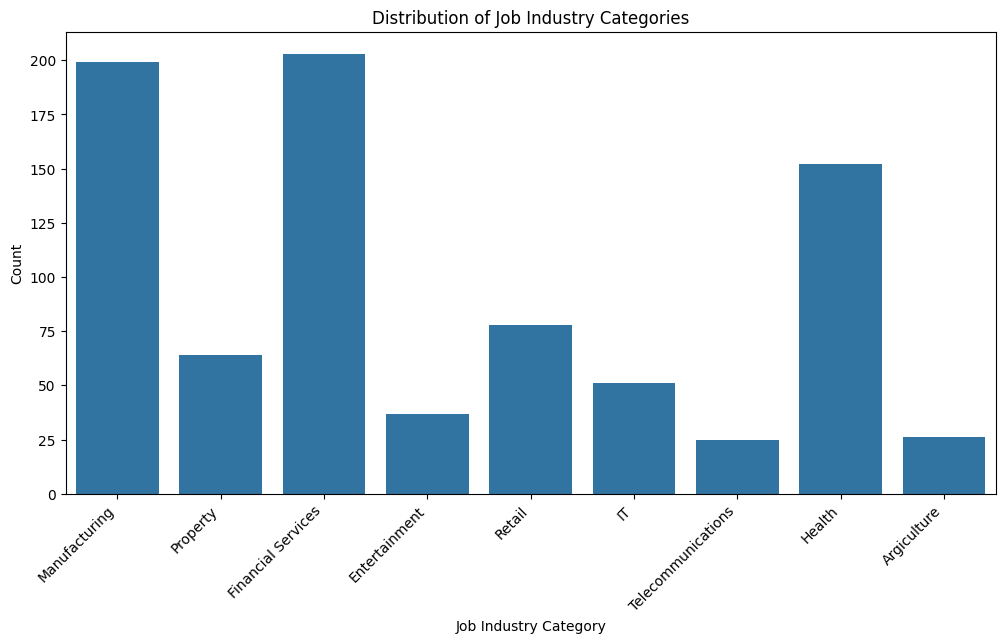

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job_industry_category', data=rfm_new)
plt.title('Distribution of Job Industry Categories')
plt.xlabel('Job Industry Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
rfm_new['job_industry_category'].fillna('Unknown', inplace=True)

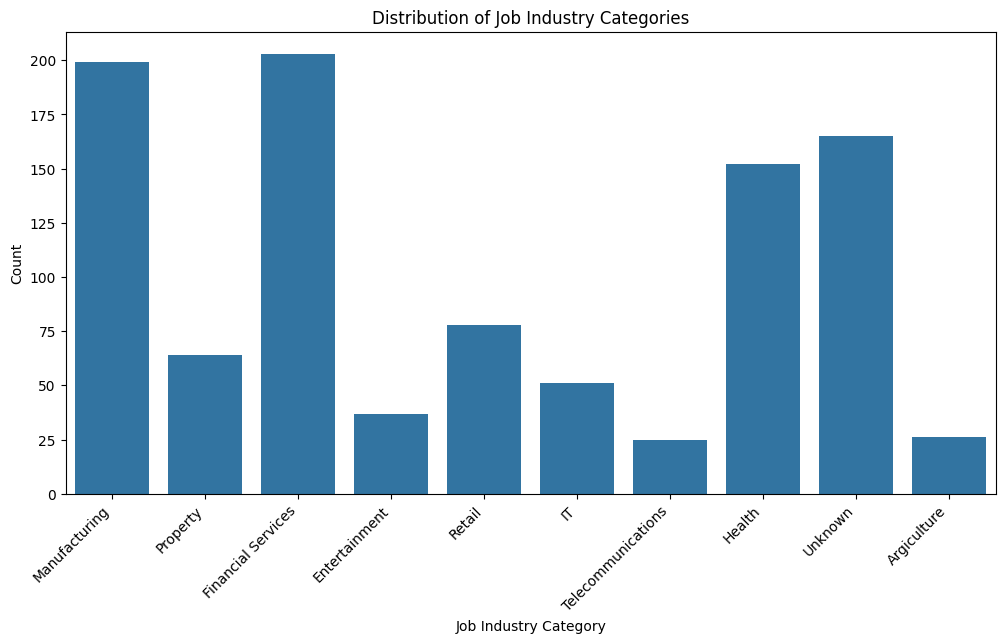

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job_industry_category', data=rfm_new)
plt.title('Distribution of Job Industry Categories')
plt.xlabel('Job Industry Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
new_column_order = ['name', 'age', 'gender', 'past_3_years_bike_related_purchases',  'categorized_job_title',
                    'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'postcode',
                    'state', 'property_valuation', 'Rank', 'Value',
                    'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20']
rfm_new = rfm_new[new_column_order]
rfm_new

,name,age,gender,past_3_years_bike_related_purchases,categorized_job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,Rank,Value,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Chickie Brister,60.0,Male,86,Administrative Roles,Manufacturing,Mass Customer,Yes,14,4500,Queensland,6,1,1.718750,1.04,1.3000,1.6250,1.381250,1
1,Morly Genery,47.0,Male,69,Engineering & Technical Roles,Property,Mass Customer,No,16,2113,New South Wales,11,1,1.718750,0.85,0.8500,1.0625,0.903125,1
2,Ardelis Forrester,43.0,Female,10,Management & Leadership Roles,Financial Services,Affluent Customer,No,10,3505,Victoria,5,1,1.718750,0.56,0.5600,0.5600,0.560000,1
3,Lucine Stutt,38.0,Female,64,Marketing & Media,Manufacturing,Affluent Customer,Yes,5,4814,Queensland,1,4,1.703125,0.51,0.6375,0.6375,0.637500,4
4,Melinda Hadlee,52.0,Female,34,Finance & Accounting,Financial Services,Affluent Customer,No,19,2093,New South Wales,9,4,1.703125,1.00,1.0000,1.2500,1.250000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand Romanetti,58.0,Male,60,Administrative Roles,Financial Services,Affluent Customer,No,9,2200,New South Wales,7,996,0.374000,0.96,0.9600,0.9600,0.960000,996
996,Burk Wortley,16.0,Male,22,Marketing & Media,Health,Mass Customer,No,6,2196,New South Wales,10,997,0.357000,0.44,0.4400,0.5500,0.467500,997
997,Melloney Temby,63.0,Female,17,Finance & Accounting,Financial Services,Affluent Customer,Yes,15,4702,Queensland,2,997,0.357000,0.77,0.9625,0.9625,0.962500,997
998,Dickie Cubbini,65.0,Male,30,Finance & Accounting,Financial Services,Mass Customer,Yes,19,4215,Queensland,2,997,0.357000,0.69,0.8625,0.8625,0.733125,997


In [ ]:
rfm_new = rfm_new[rfm_new.gender != 'U']
rfm_new['gender'].value_counts()

,count
gender,
Female,513
Male,470


In [ ]:
from google.colab import files

rfm_new.to_csv('RFM_NewCustomerList.csv', index= False)
files.download('RFM_NewCustomerList.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>